In [1]:
from specq_dev import shared, qiskit as specq_qiskit
from specq_jax import core, pulse, model
import jax

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: xlabel='Time (dt)', ylabel='Amplitude'>)

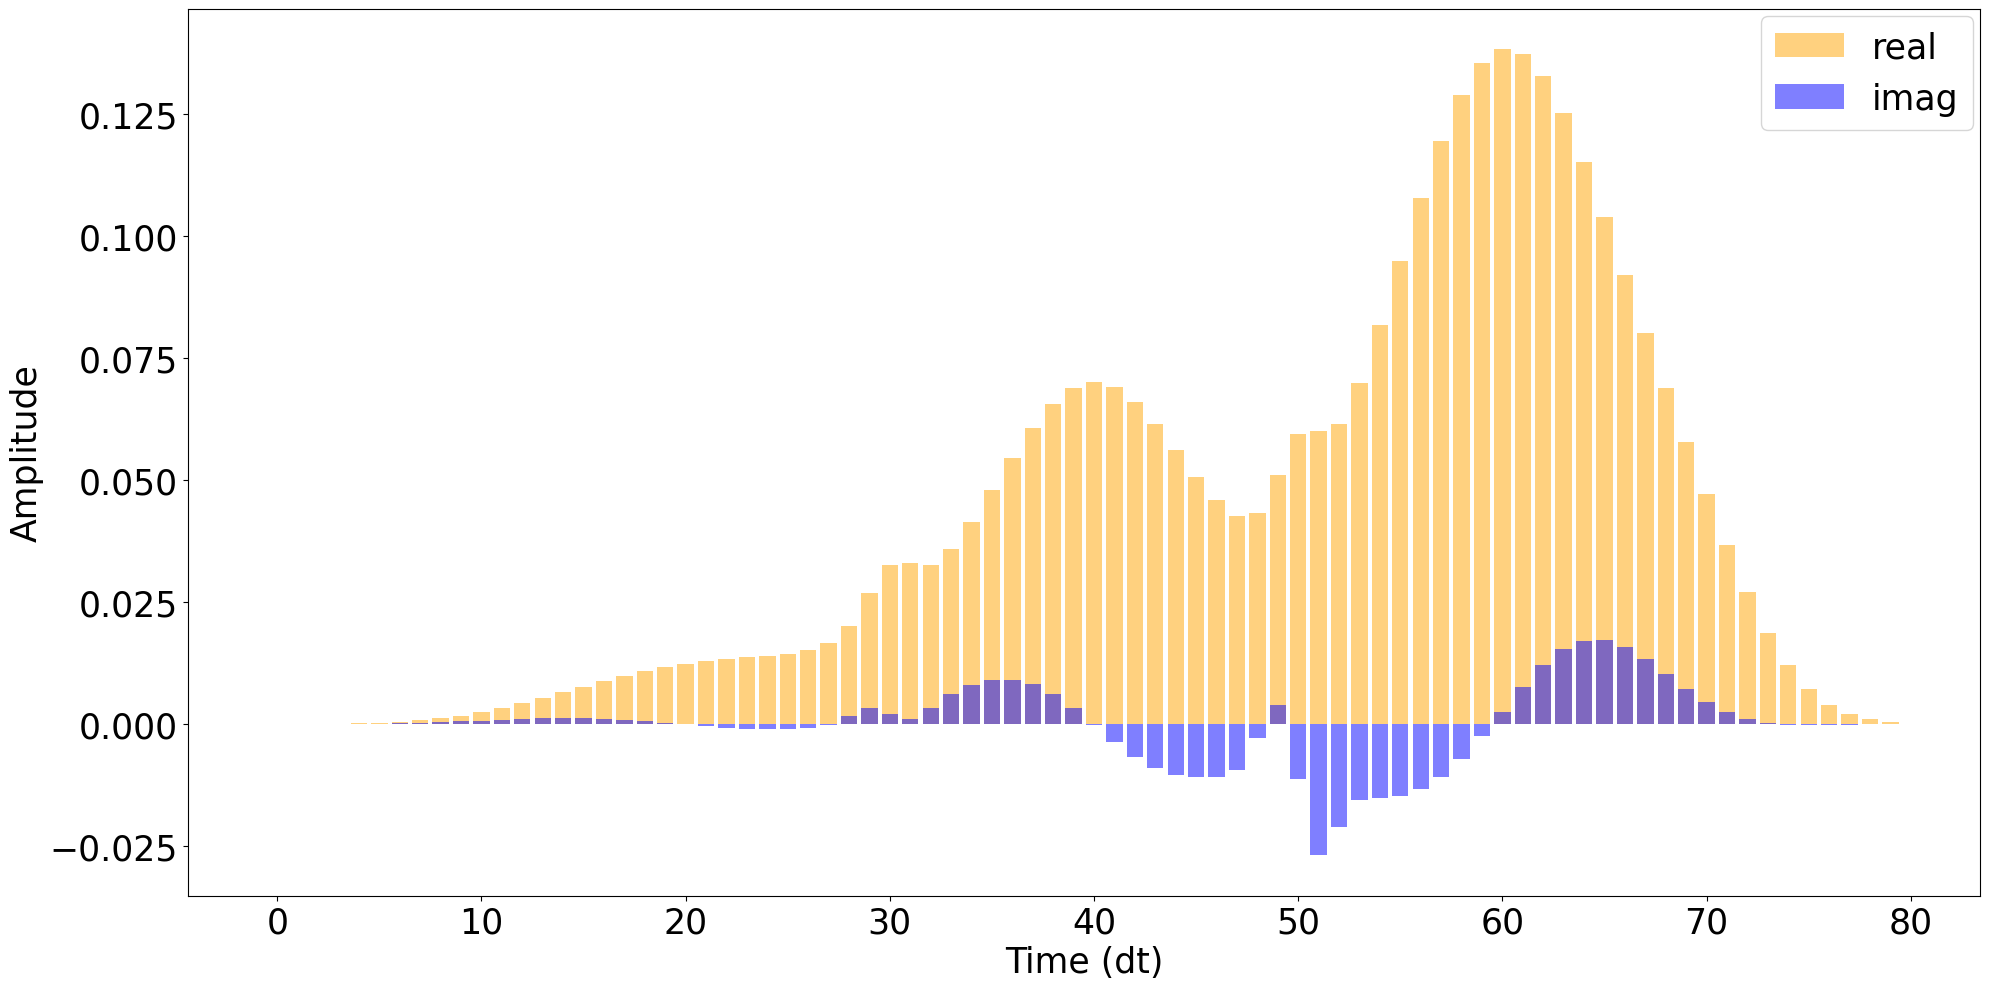

In [2]:
pulse_length_dt = 80
sigma_range = [(7, 9), (5, 7), (3, 5), (1, 3)]

pulse_sequence = pulse.JaxBasedPulseSequence(
    pulses=[
        pulse.MultiDragPulseV2(
            total_length=pulse_length_dt,
            num_drag=i,
            min_amp=0,
            max_amp=1,
            min_sigma=sigma_range[i - 1][0],
            max_sigma=sigma_range[i - 1][1],
            min_beta=-2,
            max_beta=2,
        )
        for i in range(1, 5)
    ],
    pulse_length_dt=pulse_length_dt,
)

key = jax.random.PRNGKey(0)
params = pulse_sequence.sample_params(key)
pulse_sequence.draw(params)

In [3]:
EXPERIMENT_IDENTIFIER = "0022"
SHOTS = 3000
EXPERIMENT_TAGS = [EXPERIMENT_IDENTIFIER, "random_drag", "MCMD", "test_2"]
SAMPLE_SIZE = 700 
QUBIT_IDX = 0
MASTER_KEY_SEED = 0

INSTANCE = "utokyo-kawasaki/keio-internal/keio-students"
BACKEND_NAME = "ibm_kawasaki"

service, backend = specq_qiskit.get_ibm_service_and_backend(INSTANCE, BACKEND_NAME)
qubit_info = specq_qiskit.get_qubit_information_from_backend(backend, QUBIT_IDX, service=service)
backend_properties = specq_qiskit.IBMQDeviceProperties.from_backend(backend, service=service)

config = shared.ExperimentConfiguration(
    qubits=[qubit_info],
    expectation_values_order=shared.default_expectation_values,
    parameter_names=pulse_sequence.get_parameter_names(),
    backend_name=backend_properties.name,
    shots=SHOTS,
    EXPERIMENT_IDENTIFIER=EXPERIMENT_IDENTIFIER,
    EXPERIMENT_TAGS=EXPERIMENT_TAGS,
    description="The experiment to test random drag sequence",
    device_cycle_time_ns=backend_properties.dt,
    sequence_duration_dt=pulse_sequence.pulse_length_dt,
    instance=INSTANCE,
    sample_size=SAMPLE_SIZE,
    additional_info=dict(
        MASTER_KEY_SEED=MASTER_KEY_SEED,
        model_config=dict(
            feature_size=6,
            hidden_sizes_1=[39, 13],
            hidden_sizes_2=[44, 21],
        )
    ),
)

# Save the configuration and pulse to the file
config.to_file(f"./")
pulse_sequence.to_file(f"./")

In [2]:
exp_data = shared.ExperimentData.from_folder("../0022")

In [2]:
import pandas as pd

In [14]:
pre_data = pd.read_csv('preprocess_data.csv')
config = shared.ExperimentConfiguration.from_file('./')
# Re-calculate the expectation values
pre_data["expectation_value"] = (pre_data["counts/00"] + pre_data["counts/10"]  - pre_data["counts/01"] - pre_data["counts/11"]) / config.shots

In [15]:
pre_data

,circuit_idx,job_id,expectation_value,initial_state,observable,parameters_id,parameter/0/0/amp,parameter/0/0/sigma,parameter/0/0/beta,parameter/1/0/amp,...,parameter/3/2/beta,parameter/3/3/amp,parameter/3/3/sigma,parameter/3/3/beta,job_idx,unique_id,counts/00,counts/01,counts/10,counts/11
0,0,crs819dx484g008f2rv0,0.974000,+,X,0,0.113174,8.896998,1.132260,0.951318,...,-0.117419,0.335933,2.775949,0.389185,0,0,45.0,36.0,2916.0,3.0
1,1,crs819dx484g008f2rv0,-0.943333,-,X,0,0.113174,8.896998,1.132260,0.951318,...,-0.117419,0.335933,2.775949,0.389185,0,1,19.0,2852.0,66.0,63.0
2,2,crs819dx484g008f2rv0,-0.015333,r,X,0,0.113174,8.896998,1.132260,0.951318,...,-0.117419,0.335933,2.775949,0.389185,0,2,37.0,1488.0,1440.0,35.0
3,3,crs819dx484g008f2rv0,0.022000,l,X,0,0.113174,8.896998,1.132260,0.951318,...,-0.117419,0.335933,2.775949,0.389185,0,3,32.0,1436.0,1501.0,31.0
4,4,crs819dx484g008f2rv0,0.016000,0,X,0,0.113174,8.896998,1.132260,0.951318,...,-0.117419,0.335933,2.775949,0.389185,0,4,18.0,1442.0,1506.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,295,crs8208gd8qg008rfcmg,0.000667,-,Z,699,0.110899,7.136234,-0.607996,0.995762,...,-1.077811,0.169554,1.091761,-1.844171,41,12595,25.0,1472.0,1476.0,27.0
12596,296,crs8208gd8qg008rfcmg,0.756000,r,Z,699,0.110899,7.136234,-0.607996,0.995762,...,-1.077811,0.169554,1.091761,-1.844171,41,12596,37.0,352.0,2597.0,14.0
12597,297,crs8208gd8qg008rfcmg,-0.728000,l,Z,699,0.110899,7.136234,-0.607996,0.995762,...,-1.077811,0.169554,1.091761,-1.844171,41,12597,10.0,2550.0,398.0,42.0
12598,298,crs8208gd8qg008rfcmg,0.625333,0,Z,699,0.110899,7.136234,-0.607996,0.995762,...,-1.077811,0.169554,1.091761,-1.844171,41,12598,56.0,546.0,2382.0,16.0


In [3]:
exp_data.postprocessed_data

,parameters_id,expectation_value/+/X,expectation_value/-/X,expectation_value/r/X,expectation_value/l/X,expectation_value/0/X,expectation_value/1/X,expectation_value/+/Y,expectation_value/-/Y,expectation_value/r/Y,...,parameter/3/2/beta,parameter/3/3/amp,parameter/3/3/sigma,parameter/3/3/beta,job_idx,unique_id,counts/00,counts/01,counts/10,counts/11
0,0,0.974000,-0.943333,-0.015333,0.022000,0.016000,0.010000,0.034667,0.006000,0.562000,...,-0.117419,0.335933,2.775949,0.389185,0,0,45.0,36.0,2916.0,3.0
1,1,0.960667,-0.939333,-0.073333,0.067333,0.085333,-0.040000,0.072000,-0.037333,0.484000,...,0.804565,0.533571,1.961185,-0.975892,0,18,45.0,55.0,2896.0,4.0
2,2,0.972667,-0.948667,0.000667,0.021333,0.004667,0.002667,0.024000,-0.010667,0.710000,...,-1.978747,0.988245,2.091541,0.846176,0,36,36.0,38.0,2923.0,3.0
3,3,0.969333,-0.946667,-0.056000,0.093333,0.068667,-0.037333,0.085333,-0.055333,0.226667,...,1.070578,0.499953,2.232053,-0.542297,0,54,50.0,39.0,2904.0,7.0
4,4,0.967333,-0.948000,-0.037333,0.008667,0.040000,0.018667,-0.010667,-0.016000,0.567333,...,1.218551,0.943753,2.966097,-0.950006,0,72,49.0,45.0,2902.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0.974000,-0.946000,0.003333,0.028000,0.016667,-0.004000,0.021333,0.024000,0.829333,...,-0.579606,0.717647,2.531995,0.336257,41,12510,51.0,32.0,2910.0,7.0
696,696,0.972667,-0.956667,-0.019333,0.015333,0.034667,-0.013333,0.044667,-0.021333,0.583333,...,1.566722,0.764231,1.817718,-1.628821,41,12528,46.0,36.0,2913.0,5.0
697,697,0.972000,-0.949333,0.032667,-0.030667,0.010000,0.013333,0.026000,0.054000,0.962000,...,-0.402040,0.544484,1.970433,-0.729905,41,12546,42.0,41.0,2916.0,1.0
698,698,0.968667,-0.942000,-0.063333,0.067333,0.086667,-0.048000,0.097333,-0.046667,0.156000,...,0.188166,0.767725,2.945047,0.739855,41,12564,34.0,41.0,2919.0,6.0
